# **ANALYSE DES VALEURS FONCIÈRES  **

# **RYAN MAKOUANGOU SERGE EYOUM LÉO MARTINEZ**



---





Le but de cette analyse est de réaliser plusieurs interprétations sur les valeurs foncières de 2017 à (pré-COVID) 2021 (post-COVID). La plupart des visualisations effectuées  permettent de déduire plusieurs informations quant à l'année foncière etudiées.





## Pré-requis  et installations des libraires 

In [9]:
!pip install plotly==4.5.2
!pip install plotly
!pip install caRlmap
!pip  install folium
!pip install pygal
!pip install pygal_maps_fr

     |████████████████████████████████| 7.1 MB 6.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=b2a1e47a77d20808c45d1d38ba254f0d9b1faa6b65eae579ff1bf730d4099696
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [10]:
# essential libraries
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium
import scipy
from scipy.stats import norm

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')


## Import des données et nettoyage 

### Création des dataframes 2021 et 2019

In [11]:
# importing datasets
df2021 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/817204ac-2202-4b4a-98e7-4184d154d98c', 
                         sep='|',)
df2019 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2', sep='|')

### Nettoyage des dataframes

(Remarque : On convertit aussi les données importantes: type('Valeur fonciere') == object -> type('Valeur fonciere') == float)

In [12]:
column_with_nan = df2021.columns[df2021.isna().any()]
for column in column_with_nan:
    if df2021[column].isna().sum()*100.0/len(df2021) > 50:
        df2021.drop(column, 1, inplace=True)


df2021=df2021.dropna()
df2021.drop(['No plan','No voie'], axis=1, inplace=True)

df2021["Valeur fonciere"] = df2021["Valeur fonciere"].str.replace(',','.')


df2021["Date mutation"] = pd.to_datetime(df2021["Date mutation"]) # conversion de la date en datetime
df2021["Valeur fonciere"] = pd.to_numeric(df2021["Valeur fonciere"]) # conversion de la valeur foncière en float
# data["Code departement"] = data["Code departement"].astype({'Code departement': 'int32'}) # conversion du code departement en int
# data["Nature mutation"].to_string()

df2021["Surface reelle bati"] = pd.to_numeric(df2021["Surface reelle bati"])
df2021["Code postal"] = df2021["Code postal"].astype({'Code postal': 'int32'})
df2021.dtypes



No disposition                        int64
Date mutation                datetime64[ns]
Nature mutation                      object
Valeur fonciere                     float64
Type de voie                         object
Code voie                            object
Voie                                 object
Code postal                           int32
Commune                              object
Code departement                     object
Code commune                          int64
Section                              object
Nombre de lots                        int64
Code type local                     float64
Type local                           object
Surface reelle bati                 float64
Nombre pieces principales           float64
Nature culture                       object
Surface terrain                     float64
dtype: object

In [13]:
column_with_nan = df2019.columns[df2019.isna().any()]
for column in column_with_nan:
    if df2019[column].isna().sum()*100.0/len(df2019) > 50:
        df2019.drop(column, 1, inplace=True)


df2019=df2019.dropna()
df2019.drop(['No plan','No voie'], axis=1, inplace=True)

df2019["Valeur fonciere"] = df2019["Valeur fonciere"].str.replace(',','.')


df2019["Date mutation"] = pd.to_datetime(df2019["Date mutation"]) # conversion de la date en datetime
df2019["Valeur fonciere"] = pd.to_numeric(df2019["Valeur fonciere"]) # conversion de la valeur foncière en float
# data["Code departement"] = data["Code departement"].astype({'Code departement': 'int32'}) # conversion du code departement en int
# data["Nature mutation"].to_string()

df2019["Surface reelle bati"] = pd.to_numeric(df2019["Surface reelle bati"])
df2019["Code postal"] = df2019["Code postal"].astype({'Code postal': 'int32'})
df2019.dtypes

No disposition                        int64
Date mutation                datetime64[ns]
Nature mutation                      object
Valeur fonciere                     float64
Type de voie                         object
Code voie                            object
Voie                                 object
Code postal                           int32
Commune                              object
Code departement                     object
Code commune                          int64
Section                              object
Nombre de lots                        int64
Code type local                     float64
Type local                           object
Surface reelle bati                 float64
Nombre pieces principales           float64
Nature culture                       object
Surface terrain                     float64
dtype: object

In [14]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933463 entries, 0 to 3379205
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   No disposition             933463 non-null  int64         
 1   Date mutation              933463 non-null  datetime64[ns]
 2   Nature mutation            933463 non-null  object        
 3   Valeur fonciere            933463 non-null  float64       
 4   Type de voie               933463 non-null  object        
 5   Code voie                  933463 non-null  object        
 6   Voie                       933463 non-null  object        
 7   Code postal                933463 non-null  int32         
 8   Commune                    933463 non-null  object        
 9   Code departement           933463 non-null  object        
 10  Code commune               933463 non-null  int64         
 11  Section                    933463 non-null  object 

In [15]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839169 entries, 3 to 3618971
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   No disposition             839169 non-null  int64         
 1   Date mutation              839169 non-null  datetime64[ns]
 2   Nature mutation            839169 non-null  object        
 3   Valeur fonciere            839169 non-null  float64       
 4   Type de voie               839169 non-null  object        
 5   Code voie                  839169 non-null  object        
 6   Voie                       839169 non-null  object        
 7   Code postal                839169 non-null  int32         
 8   Commune                    839169 non-null  object        
 9   Code departement           839169 non-null  object        
 10  Code commune               839169 non-null  int64         
 11  Section                    839169 non-null  object 

In [16]:
df2021.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,2021-05-01,Vente,185000.0,CHE,0471,DE VOGELAS,1370,VAL-REVERMONT,1,426,ZC,0,1.0,Maison,97.0,5.0,S,2410.0
1,1,2021-05-01,Vente,185000.0,CHE,0471,DE VOGELAS,1370,VAL-REVERMONT,1,426,ZC,0,3.0,Dépendance,0.0,0.0,S,2410.0
3,1,2021-04-01,Vente,204332.0,ALL,0276,DES ECUREUILS,1310,BUELLAS,1,65,B,0,1.0,Maison,88.0,4.0,S,866.0
4,1,2021-06-01,Vente,320000.0,RTE,0140,DE CERTINES,1250,MONTAGNAT,1,254,AZ,0,1.0,Maison,168.0,5.0,S,1426.0
5,1,2021-06-01,Vente,320000.0,RTE,0140,DE CERTINES,1250,MONTAGNAT,1,254,AZ,0,3.0,Dépendance,0.0,0.0,S,1426.0


In [17]:
df2019.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
3,1,2019-08-01,Vente,209000.0,RUE,0043,DES CHAMPAGNES,1160,PRIAY,1,314,E,0,1.0,Maison,90.0,4.0,S,940.0
4,1,2019-07-01,Vente,134900.0,LOT,A003,LE BIOLAY,1370,SAINT-ETIENNE-DU-BOIS,1,350,AA,0,1.0,Maison,101.0,5.0,S,490.0
5,1,2019-03-01,Vente,192000.0,ALL,0445,DES LIBELLULES,1340,ATTIGNAT,1,24,AI,0,1.0,Maison,88.0,4.0,S,708.0
6,1,2019-08-01,Vente,45000.0,RTE,0001,DU VIADUC,1250,CIZE,1,106,A,0,1.0,Maison,39.0,2.0,S,631.0
13,1,2019-07-01,Vente,116000.0,RTE,0105,DE MONTLEGER,1560,MANTENAY-MONTLIN,1,230,ZH,0,1.0,Maison,100.0,1.0,S,2103.0


## **PARTIE 1. ANALYSE DU TYPE DE LOCAL**

1. Répartition générale de la variable type local en France

In [18]:
temp = df2021['Type local'].value_counts()
temp


Maison                                      492262
Dépendance                                  284798
Appartement                                 106204
Local industriel. commercial ou assimilé     50199
Name: Type local, dtype: int64

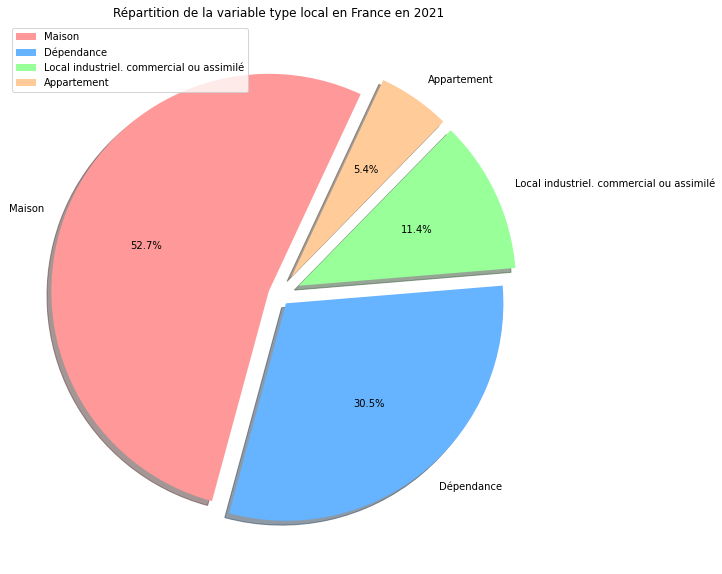

In [19]:
plt.figure(figsize=(10,10))
labels= df2021['Type local'].unique().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
area = df2021['Type local'].value_counts().tolist()
#area = [91.93, 6.88, 0.82, 0.28,0.056]
explode = (0.05,0.05,0.1,0.1)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la variable type local en France en 2021')
plt.legend()
plt.show()

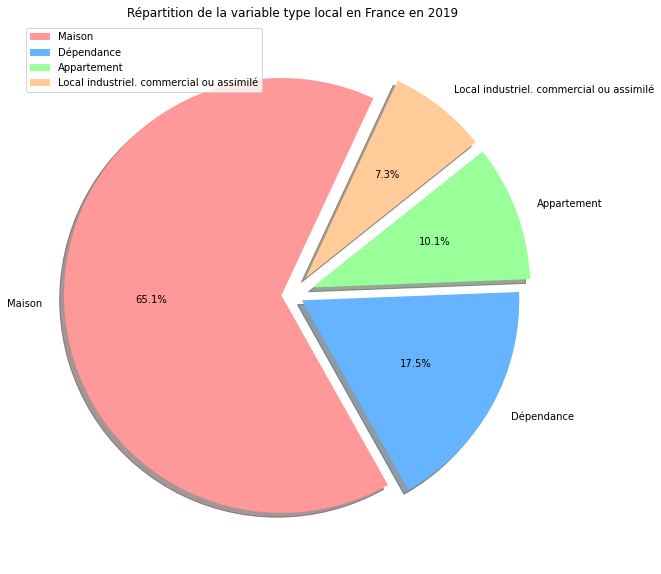

In [20]:
plt.figure(figsize=(10,10))
labels= df2019['Type local'].unique().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
area = df2019['Type local'].value_counts().tolist()
#area = [91.93, 6.88, 0.82, 0.28,0.056]
explode = (0.05,0.05,0.1,0.1)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la variable type local en France en 2019')
plt.legend()
plt.show()

Une grande augmentation de l'utilisation des dépendances est observées entre les deux graphiques

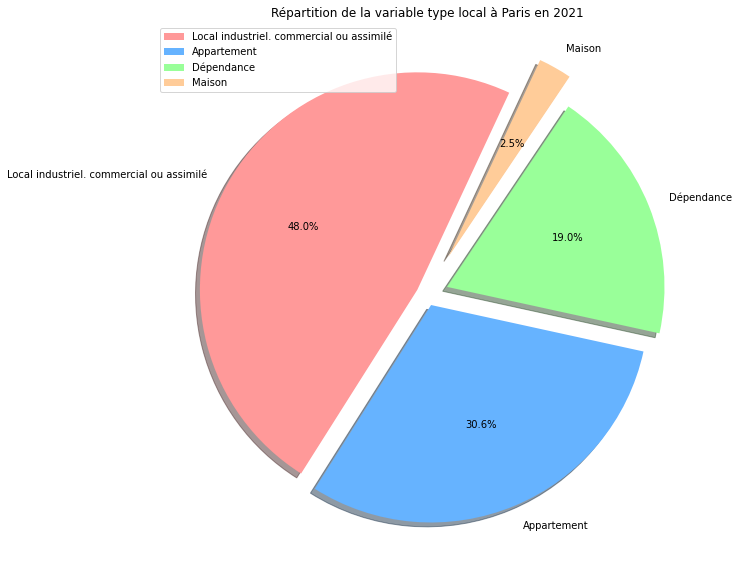

In [21]:
temp = df2021.loc[df2021['Commune'].str.startswith('PARIS ')]
temp

plt.figure(figsize=(10,10))
labels= temp['Type local'].unique().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
area = temp['Type local'].value_counts().tolist()
#area = [91.93, 6.88, 0.82, 0.28,0.056]
explode = (0.05,0.05,0.1,0.2)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la variable type local à Paris en 2021')
plt.legend()
plt.show()

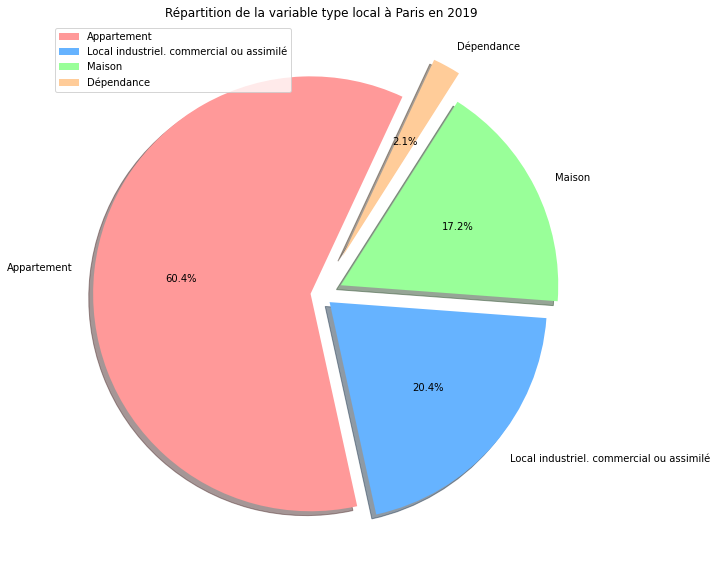

In [22]:
temp = df2019.loc[df2019['Commune'].str.startswith('PARIS ')]
plt.figure(figsize=(10,10))
labels= temp['Type local'].unique().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
area = temp['Type local'].value_counts().tolist()
#area = [91.93, 6.88, 0.82, 0.28,0.056]
explode = (0.05,0.05,0.1,0.2)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la variable type local à Paris en 2019')
plt.legend()
plt.show()

D'après les diagrammes, bien que la majorité des locaux 2021 sont des maisons. La tendance dans les grandes villes (plus particulièrement à Paris) ne resemble pas aux digrammes pour la France. En effet, les appartements et dépendances sont majoritaires.
---


---




##**PARTIE 2. ANALYSE SUR LA NATURE DES MUTATIONS**

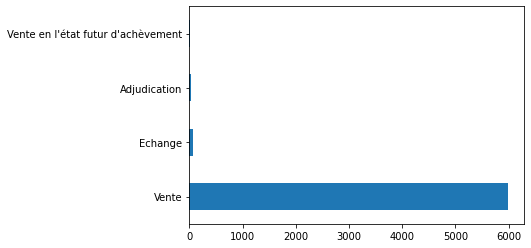

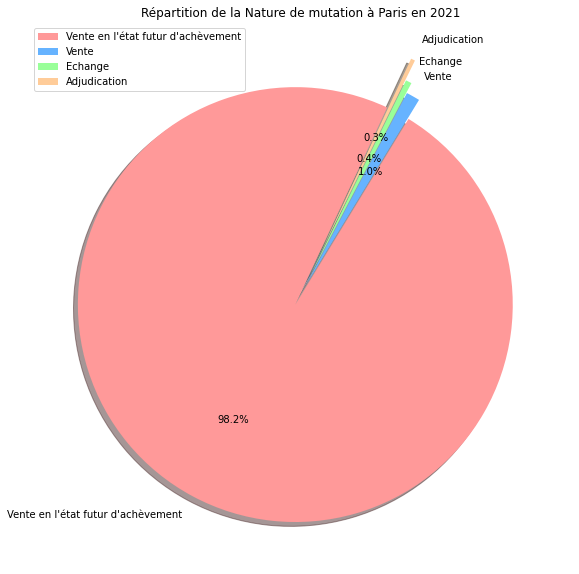

In [23]:
temp = df2021.loc[df2021['Commune'].str.startswith('PARIS ')]
temp['Nature mutation'].value_counts().plot(kind='barh')

plt.figure(figsize=(10,10))
labels= temp['Nature mutation'].unique().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
area = temp['Nature mutation'].value_counts().tolist()
#area = [91.93, 6.88, 0.82, 0.28,0.056]
explode = (0.05,0.05,0.1,0.2)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la Nature de mutation à Paris en 2021')
plt.legend()
plt.show()

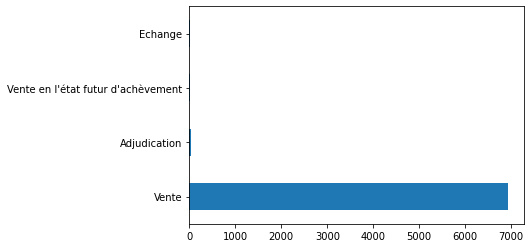

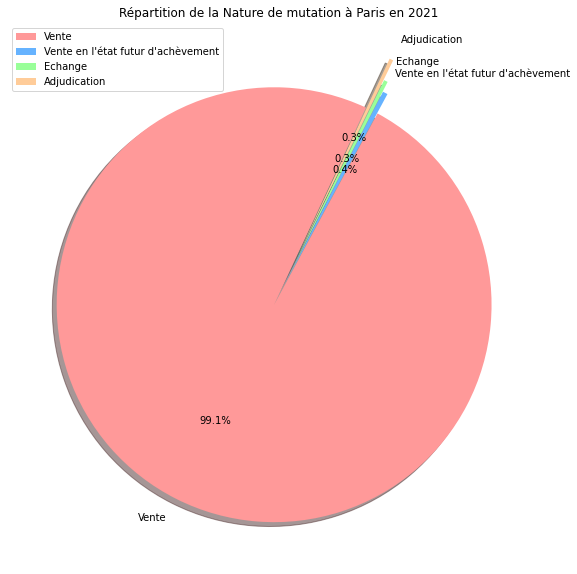

In [24]:
temp = df2019.loc[df2019['Commune'].str.startswith('PARIS ')]
temp['Nature mutation'].value_counts().plot(kind='barh')

plt.figure(figsize=(10,10))
labels= temp['Nature mutation'].unique().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
area = temp['Nature mutation'].value_counts().tolist()
#area = [91.93, 6.88, 0.82, 0.28,0.056]
explode = (0.05,0.05,0.1,0.2)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la Nature de mutation à Paris en 2021')
plt.legend()
plt.show()

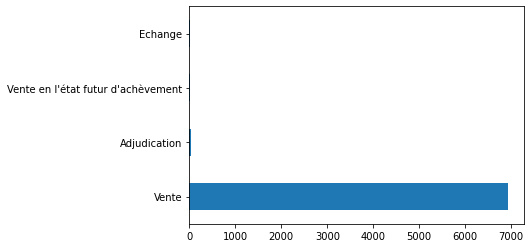

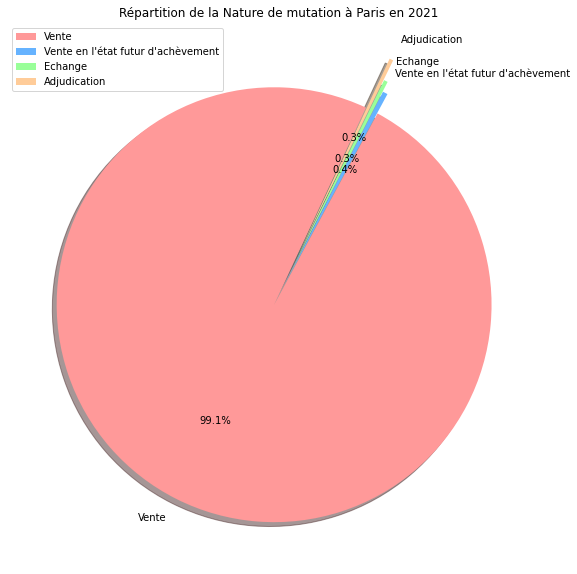

In [25]:
temp = df2019.loc[df2019['Commune'].str.startswith('PARIS ')]
temp['Nature mutation'].value_counts().plot(kind='barh')

plt.figure(figsize=(10,10))
labels= temp['Nature mutation'].unique().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
area = temp['Nature mutation'].value_counts().tolist()
#area = [91.93, 6.88, 0.82, 0.28,0.056]
explode = (0.05,0.05,0.1,0.2)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la Nature de mutation à Paris en 2021')
plt.legend()
plt.show()

Quelque soit l'année, la nature des mutations sont des ventes sauf dans des cas rares.

Text(0, 0.5, 'Nombre de mutation')

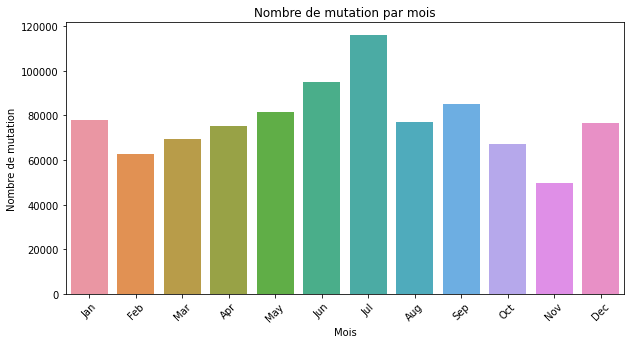

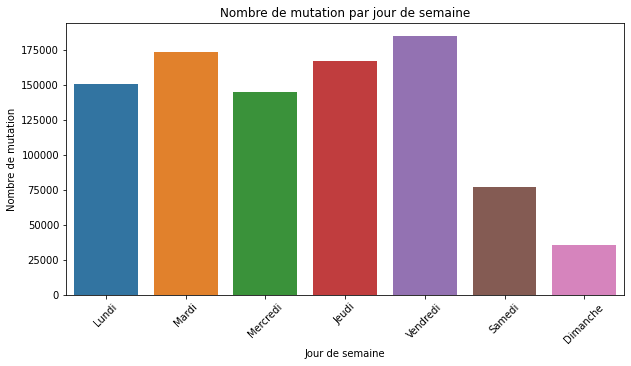

In [26]:
plt.figure(figsize=(10,5))
df2021['month'] = df2021["Date mutation"].map(lambda x: x.month)
ax = sns.countplot(x=df2021.month)
ax.set_title('Nombre de mutation par mois')
ax.set_xlabel('Mois')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
ax.set_ylabel('Nombre de mutation')


plt.figure(figsize=(10,5))
df2021['dayofweek'] = df2021["Date mutation"].map(lambda x: x.dayofweek)
ax = sns.countplot(x=df2021.dayofweek)
ax.set_title('Nombre de mutation par jour de semaine')
ax.set_xlabel('Jour de semaine')
ax.set_xticklabels(['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'],rotation=45)
ax.set_ylabel('Nombre de mutation')

On remarque que le nombre de mutations est au plus haut en Juin et Juillet. Sachant que la plupart des mutations sont des ventes. Ce graphique montrerait à quel moment les français eménnagent dans de nouveaux locaux.

Text(0, 0.5, 'Nombre de mutation')

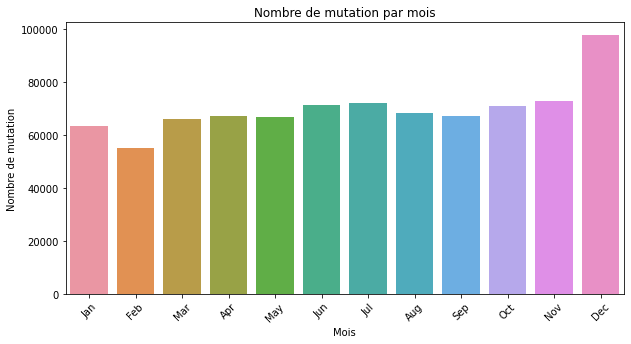

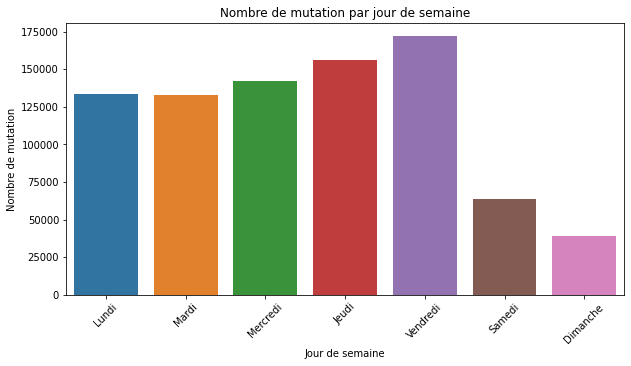

In [27]:
plt.figure(figsize=(10,5))
df2019['month'] = df2019["Date mutation"].map(lambda x: x.month)
ax = sns.countplot(x=df2019.month)
ax.set_title('Nombre de mutation par mois')
ax.set_xlabel('Mois')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
ax.set_ylabel('Nombre de mutation')


plt.figure(figsize=(10,5))
df2019['dayofweek'] = df2019["Date mutation"].map(lambda x: x.dayofweek)
ax = sns.countplot(x=df2019.dayofweek)
ax.set_title('Nombre de mutation par jour de semaine')
ax.set_xlabel('Jour de semaine')
ax.set_xticklabels(['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'],rotation=45)
ax.set_ylabel('Nombre de mutation')

Etonnamment, les graphiques post et pré-covid ne se reseemblent pas. La plupart des mutations en 2019 sont effectués en décembre, soit en fin d'année.

###ANALYSE SUR LES VALEURS FONCIÈRES 

VENTES LES PLUS CHERES DE FRANCE

In [28]:


pd.options.display.max_columns = None
df_ve = df2021[df2021['Nature mutation']=='Vente'].sort_values(by='Valeur fonciere', ascending=False)
df_ve.head(20)



,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,dayofweek
3189443,1,2021-07-20,Vente,297800000.0,AV,6196,NELSON MANDELA,94110,ARCUEIL,94,3,C,0,4.0,Local industriel. commercial ou assimilé,285.0,0.0,S,2720.0,7,1
3189444,1,2021-07-20,Vente,297800000.0,AV,6196,NELSON MANDELA,94110,ARCUEIL,94,3,C,0,4.0,Local industriel. commercial ou assimilé,15525.0,0.0,S,2720.0,7,1
3189447,1,2021-07-20,Vente,297800000.0,AV,6196,NELSON MANDELA,94110,ARCUEIL,94,3,C,0,4.0,Local industriel. commercial ou assimilé,14109.0,0.0,S,2586.0,7,1
3189446,1,2021-07-20,Vente,297800000.0,AV,6196,NELSON MANDELA,94110,ARCUEIL,94,3,C,0,4.0,Local industriel. commercial ou assimilé,15087.0,0.0,S,3760.0,7,1
3189445,1,2021-07-20,Vente,297800000.0,AV,6196,NELSON MANDELA,94110,ARCUEIL,94,3,C,0,4.0,Local industriel. commercial ou assimilé,401.0,0.0,S,2720.0,7,1
3316984,1,2021-09-15,Vente,276543840.0,BD,4485,HAUSSMANN,75008,PARIS 08,75,108,BU,0,4.0,Local industriel. commercial ou assimilé,1142.0,0.0,S,1715.0,9,2
3316981,1,2021-09-15,Vente,276543840.0,BD,4485,HAUSSMANN,75008,PARIS 08,75,108,BU,0,4.0,Local industriel. commercial ou assimilé,1364.0,0.0,S,1715.0,9,2
3316978,1,2021-09-15,Vente,276543840.0,BD,4485,HAUSSMANN,75008,PARIS 08,75,108,BU,0,4.0,Local industriel. commercial ou assimilé,1102.0,0.0,S,1715.0,9,2
3316980,1,2021-09-15,Vente,276543840.0,BD,4485,HAUSSMANN,75008,PARIS 08,75,108,BU,0,4.0,Local industriel. commercial ou assimilé,430.0,0.0,S,1715.0,9,2
3316979,1,2021-09-15,Vente,276543840.0,BD,4485,HAUSSMANN,75008,PARIS 08,75,108,BU,0,4.0,Local industriel. commercial ou assimilé,1391.0,0.0,S,1715.0,9,2


Les plus grosses ventes sont des locaux à plusieurs mètres carrés

In [29]:
pd.options.display.max_columns = None
df_ve = df2019[df2019['Nature mutation']=='Vente'].sort_values(by='Valeur fonciere', ascending=False)
df_ve.head(20)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,dayofweek
3319363,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,2948.0,0.0,S,28656.0,7,1
3319340,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,1012.0,0.0,S,28656.0,7,1
3319342,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,1478.0,0.0,S,28656.0,7,1
3319343,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,32.0,0.0,S,28656.0,7,1
3319344,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,2915.0,0.0,S,28656.0,7,1
3319345,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,1219.0,0.0,S,28656.0,7,1
3319346,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,2949.0,0.0,S,28656.0,7,1
3319347,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,3213.0,0.0,S,28656.0,7,1
3319348,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,1162.0,0.0,S,28656.0,7,1
3319349,1,2019-07-30,Vente,690186750.0,RUE,9650,DE VILLIERS,92200,NEUILLY-SUR-SEINE,92,51,Q,0,4.0,Local industriel. commercial ou assimilé,2408.0,0.0,S,28656.0,7,1


On remarque que la plupart des transactions les plus chères sont effectuées en Ile-de-France quel que soit l'année

**VENTE DES MAISONS LES PLUS CHÈRES DE FRANCE**

In [30]:
pd.options.display.max_columns = None
df_ve = df2021[(df2021['Nature mutation']=='Vente') & (df2021['Type local']=='Maison')].sort_values(by='Valeur fonciere', ascending=False)
df_ve.head(20)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,dayofweek
1282258,1,2021-07-29,Vente,220623264.0,RUE,0327,GUSTAVE COURBET,39100,FOUCHERANS,39,233,AN,0,1.0,Maison,87.0,3.0,S,954.0,7,3
1281379,1,2021-07-29,Vente,220623264.0,CHE,0520,DE LA COMBE TRUCHENNE,39100,DOLE,39,198,AS,0,1.0,Maison,86.0,4.0,S,1454.0,7,3
1293510,1,2021-07-29,Vente,220623264.0,RUE,0872,DU POINT DU JOUR,39160,SAINT-AMOUR,39,475,ZH,0,1.0,Maison,99.0,4.0,S,1363.0,7,3
1293509,1,2021-07-29,Vente,220623264.0,RUE,0872,DU POINT DU JOUR,39160,SAINT-AMOUR,39,475,ZH,0,1.0,Maison,99.0,4.0,S,1363.0,7,3
1293507,1,2021-07-29,Vente,220623264.0,RUE,0546,DU GALVAIN,39160,SAINT-AMOUR,39,475,AM,0,1.0,Maison,98.0,4.0,S,949.0,7,3
1293506,1,2021-07-29,Vente,220623264.0,RUE,0546,DU GALVAIN,39160,SAINT-AMOUR,39,475,AM,0,1.0,Maison,98.0,4.0,S,949.0,7,3
1293505,1,2021-07-29,Vente,220623264.0,RUE,0546,DU GALVAIN,39160,SAINT-AMOUR,39,475,AM,0,1.0,Maison,98.0,4.0,S,949.0,7,3
1293504,1,2021-07-29,Vente,220623264.0,RUE,0546,DU GALVAIN,39160,SAINT-AMOUR,39,475,AM,0,1.0,Maison,98.0,4.0,S,949.0,7,3
1293503,1,2021-07-29,Vente,220623264.0,RUE,0546,DU GALVAIN,39160,SAINT-AMOUR,39,475,AM,0,1.0,Maison,104.0,4.0,S,949.0,7,3
1293391,1,2021-07-29,Vente,220623264.0,RUE,0820,DE PERROSET,39160,SAINT-AMOUR,39,475,AI,0,1.0,Maison,90.0,4.0,S,2400.0,7,3


In [31]:
pd.options.display.max_columns = None
df_ve = df2021[(df2021['Nature mutation']=='Vente') &(df2021['Commune'].str.startswith('PARIS ')) ]
df_ve=df_ve[((df_ve['Type local']=='Appartement') | (df_ve['Type local']=='Maison'))].sort_values(by='Valeur fonciere', ascending=False)

df_ve.head(20)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,dayofweek
3331688,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,63.0,2.0,S,599.0,12,2
3331669,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,61.0,2.0,S,599.0,12,2
3331700,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,74.0,3.0,S,599.0,12,2
3331699,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,47.0,2.0,S,599.0,12,2
3331693,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,88.0,3.0,S,599.0,12,2
3331690,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,99.0,3.0,S,599.0,12,2
3331687,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,98.0,3.0,S,599.0,12,2
3331686,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,46.0,2.0,S,599.0,12,2
3331675,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,63.0,2.0,S,599.0,12,2
3331670,1,2021-12-22,Vente,80100000.0,RUE,6176,DES MATHURINS,75009,PARIS 09,75,109,AQ,0,2.0,Appartement,98.0,3.0,S,599.0,12,2


Commune avec le plus de ventes

Commune
VITRY LE FRANCOIS    6576
LONS LE SAUNIER      6433
BORDEAUX             3644
LILLE                3453
SAINT-ETIENNE        3243
Name: Commune, dtype: int64

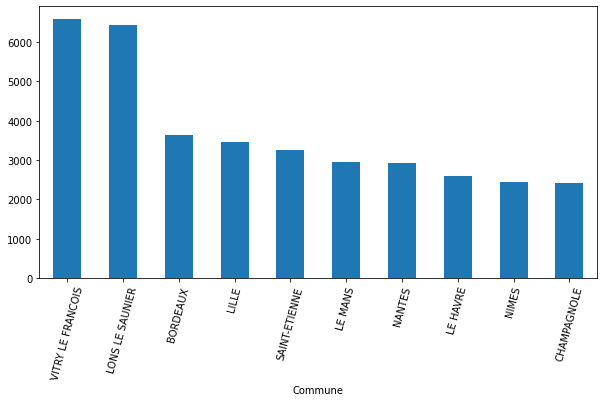

In [32]:


plt.figure(figsize=(10,5))
df_vente = df2021[df2021['Nature mutation']=='Vente'].groupby(['Commune'])['Commune'].count().sort_values(ascending=False)
#df_vente_par_jour[0:5]
df_vente.head(10).plot.bar(x='Commune', rot=75)

df_vente.head()

Commune
BOURGES     4274
LE HAVRE    4170
LILLE       3374
TOULOUSE    3164
BORDEAUX    2791
Name: Commune, dtype: int64

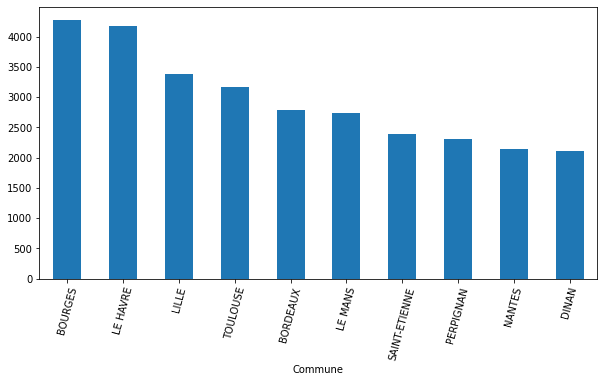

In [33]:
plt.figure(figsize=(10,5))
df_vente = df2019[df2019['Nature mutation']=='Vente'].groupby(['Commune'])['Commune'].count().sort_values(ascending=False)
#df_vente_par_jour[0:5]
df_vente.head(10).plot.bar(x='Commune', rot=75)

df_vente.head()

Dans les villes qui effectuent le pljus de ventes durant ces 2 années, on retrouve Bordeaux, Lille, Saint-Etienne...

Commune
PARIS 17    775
PARIS 15    582
PARIS 08    469
PARIS 09    423
PARIS 20    406
Name: Commune, dtype: int64

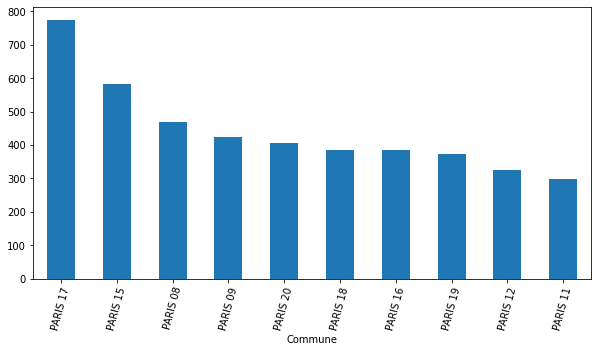

In [34]:
plt.figure(figsize=(10,5))
df_vente = df2021[(df2021['Nature mutation']=='Vente') & (df2021['Commune'].str.startswith('PARIS '))].groupby(['Commune'])['Commune'].count().sort_values(ascending=False)
#df_vente_par_jour[0:5]
df_vente.head(10).plot.bar(x='Commune', rot=75)

df_vente.head()

Commune
PARIS 15    843
PARIS 14    725
PARIS 10    613
PARIS 20    585
PARIS 17    491
Name: Commune, dtype: int64

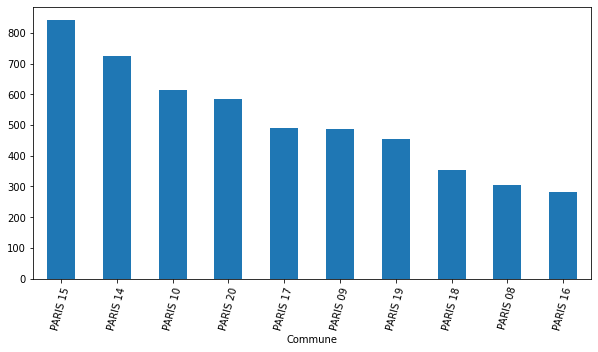

In [35]:
plt.figure(figsize=(10,5))
df_vente = df2019[(df2019['Nature mutation']=='Vente') & (df2019['Commune'].str.startswith('PARIS '))].groupby(['Commune'])['Commune'].count().sort_values(ascending=False)
#df_vente_par_jour[0:5]
df_vente.head(10).plot.bar(x='Commune', rot=75)

df_vente.head()

## **D'AUTRES VISUALISATIONS INTÉRESSANTES...**

Text(0.5, 1.0, "Villes avec le plus d'expropriation")

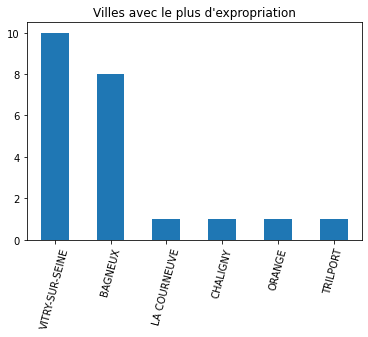

In [36]:


df_ex = df2021[df2021['Nature mutation']=='Expropriation'].sort_values(by='Valeur fonciere', ascending=False)
df_ex.head(1)

df_ex.Commune.value_counts().head(10)

ax = df_ex.Commune.value_counts().head(10).plot.bar(rot=75)
ax.set_title('Villes avec le plus d\'expropriation')

Une hypothèse serait la construction de la gare de BAGNEUX ET SON AGGRANDISSEMENT POUR LE PROJET GRAND PARIS...

['PARIS 08', 'PARIS 03', 'PARIS 01', 'PARIS 17', 'PARIS 18', 'PARIS 02', 'PARIS 19', 'PARIS 10', 'PARIS 20', 'PARIS 09', 'PARIS 04', 'PARIS 07', 'PARIS 06', 'PARIS 05', 'PARIS 14', 'PARIS 13', 'PARIS 16', 'PARIS 12', 'PARIS 15', 'PARIS 11']


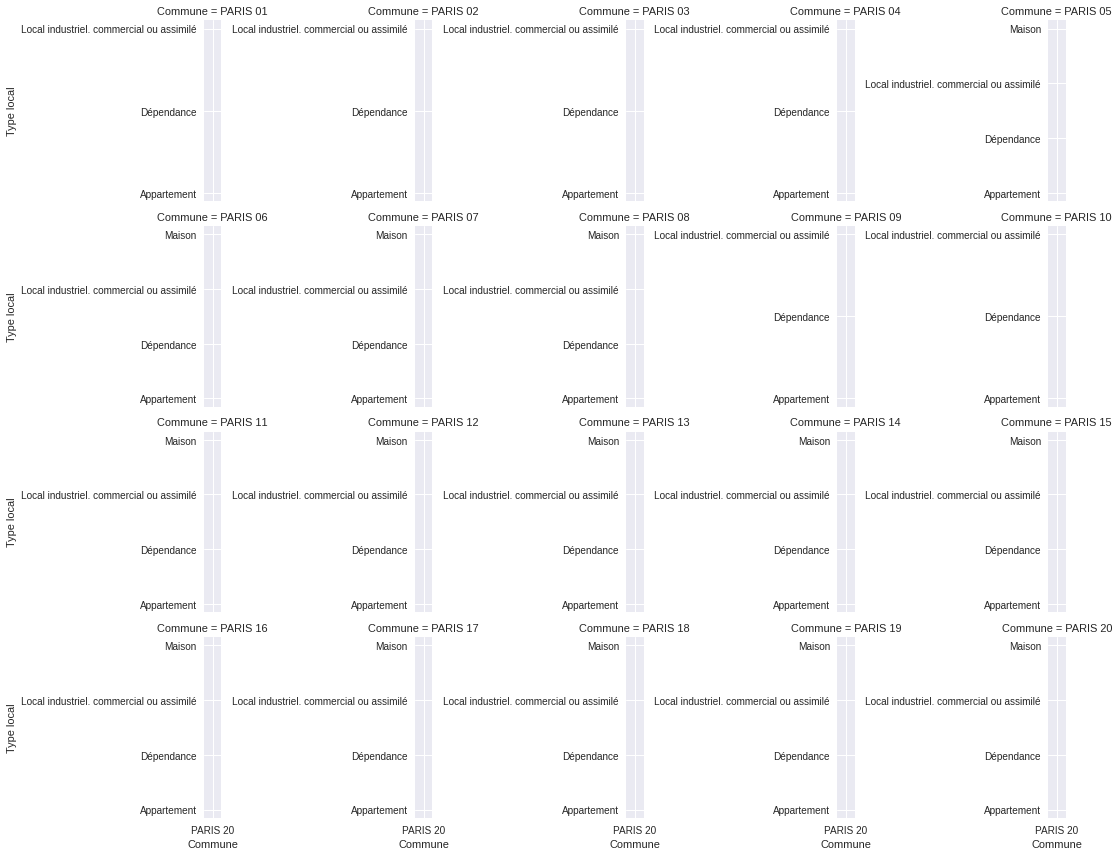

In [37]:
temp = df2021.loc[df2021['Commune'].str.startswith('PARIS ')]
temp.groupby(['Commune','Type local'])['Type local'].count()
#temp.style.background_gradient(cmap='Reds')

liste_Commune = list(temp['Commune'].unique())
print(liste_Commune)

temp = temp.reset_index().sort_values(by=['Commune','Type local'])

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Commune", hue="Type local", sharey=False, col_wrap=5)
g = g.map(plt.plot, "Commune", "Type local")
g.set_xticklabels(rotation=0)
plt.show()

### Nombre de signatures en fonction de la Date

In [38]:
temp = df2021.groupby(['Date mutation']).count()
temp

,No disposition,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,dayofweek
Date mutation,,,,,,,,,,,,,,,,,,,,
2021-01-01,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2021-01-02,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804
2021-01-03,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719
2021-01-04,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775
2021-01-05,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590
2021-12-28,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276
2021-12-29,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784,2784


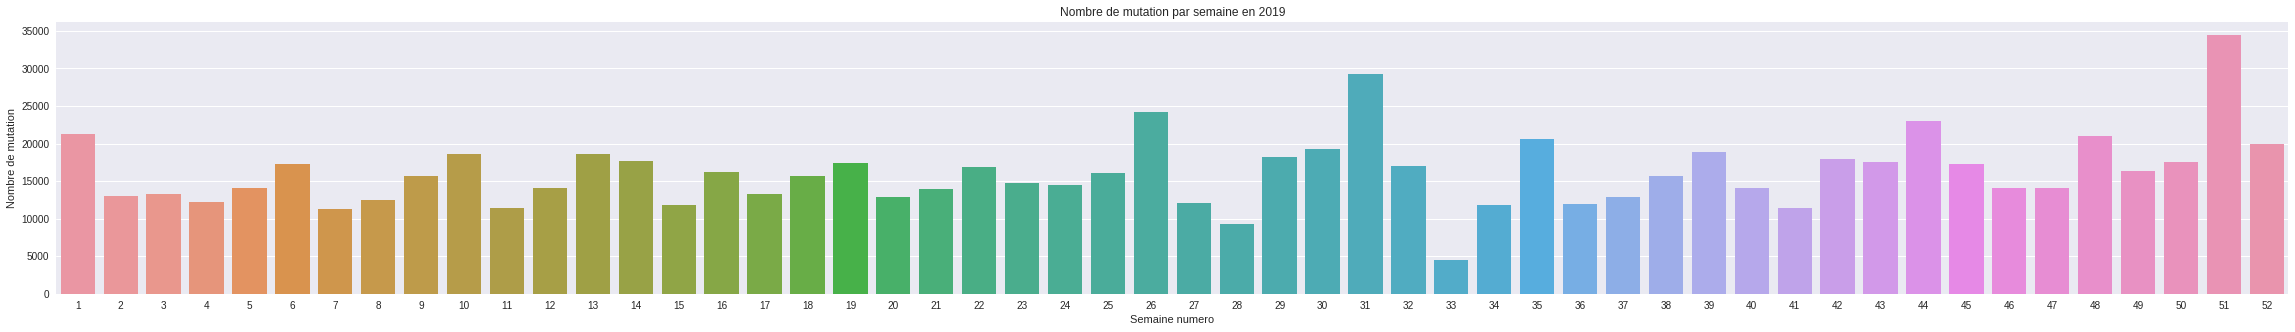

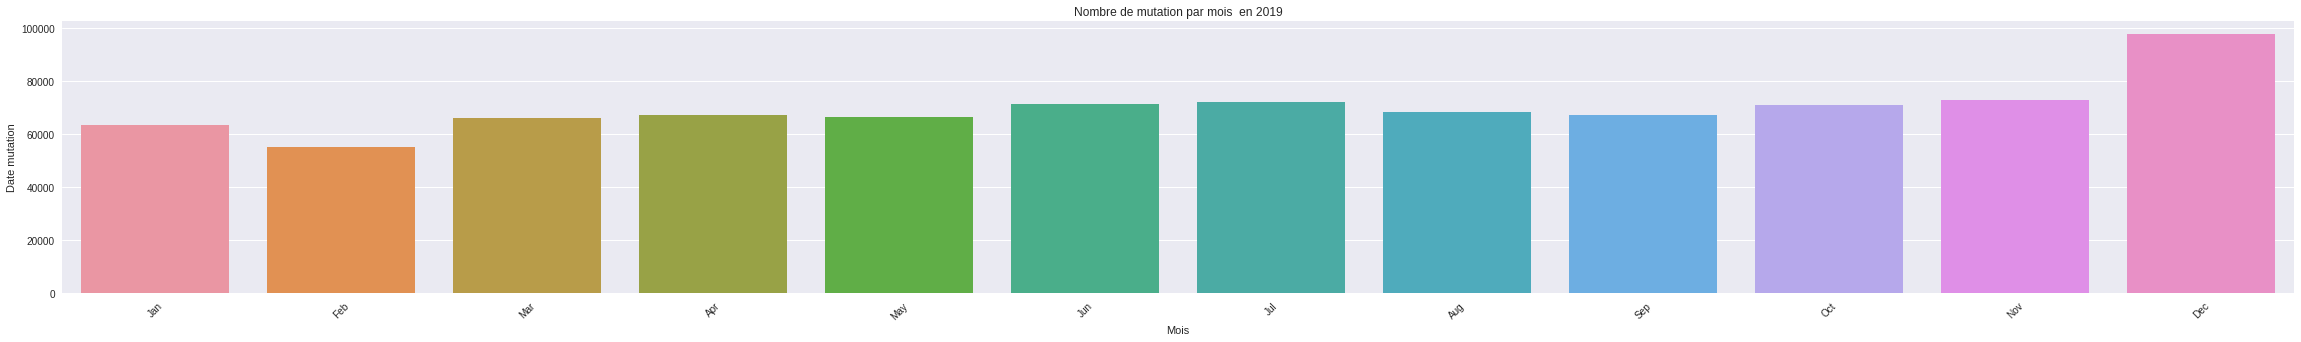

In [39]:


plt.figure(figsize=(40,5))
df2019['week'] = df2019["Date mutation"].map(lambda x: x.week)
ax = sns.countplot(x=df2019.week)
ax.set_title('Nombre de mutation par semaine en 2019')
ax.set_xlabel('Semaine numero')
ax.set_ylabel('Nombre de mutation')


plt.figure(figsize=(40,5))

df2019['month'] = df2019["Date mutation"].map(lambda x: x.month)
ax = sns.countplot(x=df2019.month)
ax.set_title('Nombre de mutation par mois  en 2019')
ax.set_xlabel('Mois')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
ax.set_ylabel('Date mutation')



temp = df2019.groupby(['Date mutation']).count()
temp = temp.reset_index()
fig = px.bar(temp, x="Date mutation", y='Nature mutation', title="Nombre de mutations par jour en  France en 2019")
fig.show()

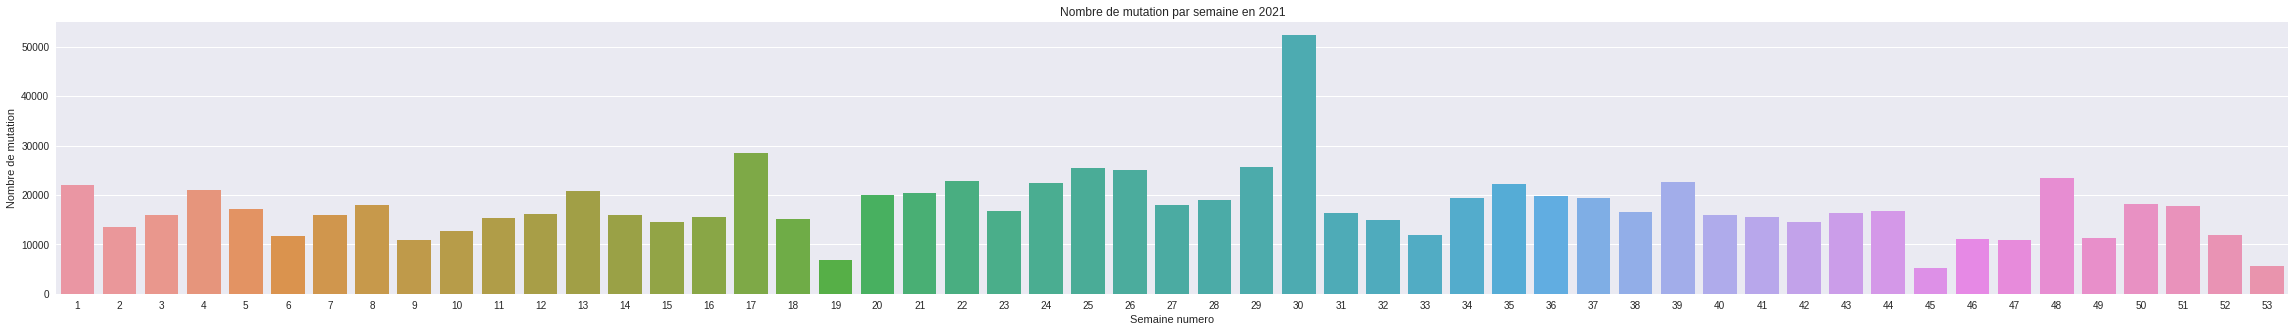

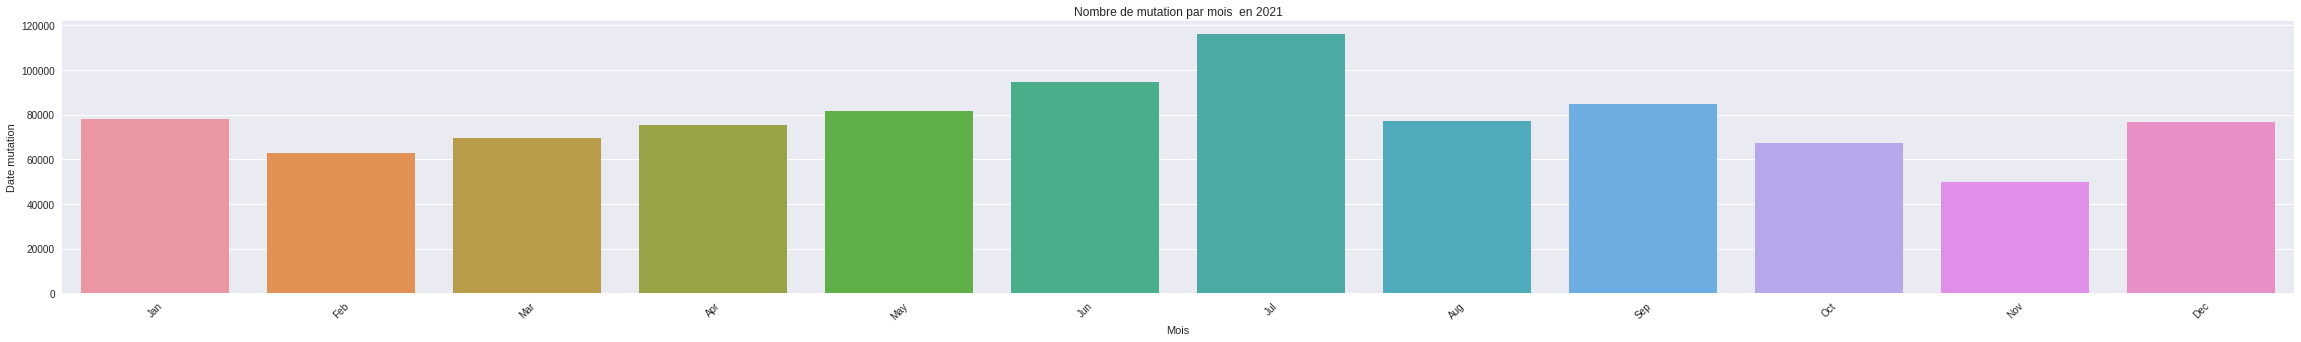

In [40]:


plt.figure(figsize=(40,5))
df2021['week'] = df2021["Date mutation"].map(lambda x: x.week)
ax = sns.countplot(x=df2021.week)
ax.set_title('Nombre de mutation par semaine en 2021')
ax.set_xlabel('Semaine numero')
ax.set_ylabel('Nombre de mutation')


plt.figure(figsize=(40,5))

df2021['month'] = df2021["Date mutation"].map(lambda x: x.month)
ax = sns.countplot(x=df2021.month)
ax.set_title('Nombre de mutation par mois  en 2021')
ax.set_xlabel('Mois')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
ax.set_ylabel('Date mutation')



temp = df2021.groupby(['Date mutation']).count()
temp = temp.reset_index()
fig = px.bar(temp, x="Date mutation", y='Nature mutation', title="Nombre de mutations par jour en  France en 2021")
fig.show()

In [41]:

temp = df2021[df2021['Commune'].str.startswith('PARIS ')].groupby(['Date mutation']).count()
temp = temp.reset_index()
fig=px.bar(temp, x="Date mutation", y='Nature mutation', title="Nombre de mutation par jour à Paris en 2021")
fig.show()





temp = df2019[df2019['Commune'].str.startswith('PARIS ')].groupby(['Date mutation']).count()
temp = temp.reset_index()
fig=px.bar(temp, x="Date mutation", y='Nature mutation', title="Nombre de mutation par jour à Paris en 2019")
fig.show()


D'après ces 6 histogrammes, nous pouvons voir la répartition en fonction du jour du nombre de mutations en France et à Paris

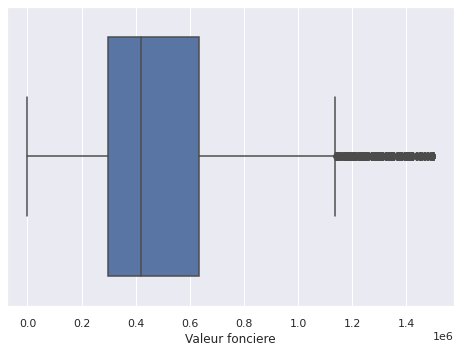

In [42]:
test=df2021.loc[(df2021['Valeur fonciere']<=1500000) & (df2021['Code departement']==78)]
sns.set(style="darkgrid")
sns.boxplot( x=test['Valeur fonciere'],orient='h')

In [44]:
surface = list(df2021['Surface reelle bati'])
code_dep = list(df2021['Code departement'])
print(len(code_dep))
n= df2021.shape[0]
print(n)

933463
933463


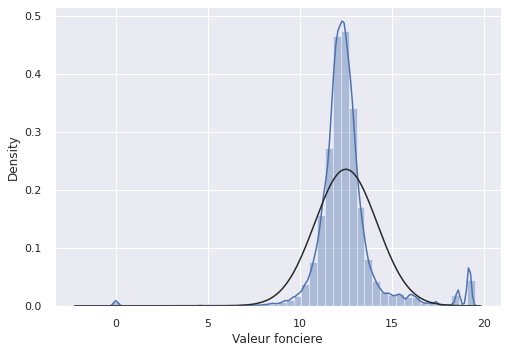

<Figure size 576x396 with 0 Axes>

In [46]:

y=np.log(df2021['Valeur fonciere'])
sns.distplot(y, fit=norm);
fig=plt.figure()

In [1]:
import os

os.system('jupyter nbconvert --to html TD9_TD10_Python_Ryan_MAKOUANGOU_Léo_MARTINEZ_Serge_EYOUM.ipynb')


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'TD9_TD10_Python_Ryan_MAKOUANGOU_Léo_MARTINEZ_Serge_EYOUM.ipynb' matched no files


65280